# ITS307 Data Analytics : Autumn Semester 2022
# ClassWork 

# Supervised Learning 


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [3]:
import pandas as pd


In [10]:
import numpy as np


In [11]:
import matplotlib.pyplot as plt

# 2. Loading and Cleaning with Pandas

In [23]:
datasets1 = pd.read_csv('test-data.csv')
datasets1.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [26]:
datasets02 = pd.read_csv('train-data.csv')
datasets02.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [40]:
datasets02.drop(labels='Unnamed: 0',axis =1,inplace=True)
datasets02.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [41]:
datasets02.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [85]:
mielage = datasets02.value_counts()
umileage = [float(i.split()[0]) for i in mileage.index]
umileage[0:10]

[18.9, 17.0, 18.6, 20.36, 21.1, 17.8, 16.0, 12.8, 20.0, 18.0]

In [86]:
datasets02.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

# 3.  EDA and Visualization

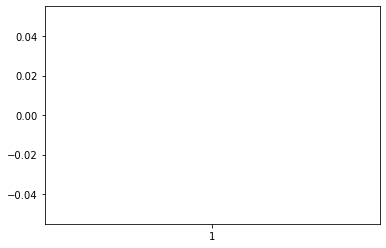

In [93]:
import seaborn as sns
plt.boxplot(datasets02.Seats)
plt.show()

# 4. Feature Engineering 

# 5. Training Model

# 6. Prediction

# 7. Evaluating your Model